# Healthcare NoShow Appointment Prediction Analysis

Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: DEC 01 2024

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler  # Add this import


from sklearn.metrics import accuracy_score , classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Healthcare NoShow/healthcare_noshows_appointments.csv")

In [4]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [5]:
# Convert date columns to datetime
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

# Check for missing values
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

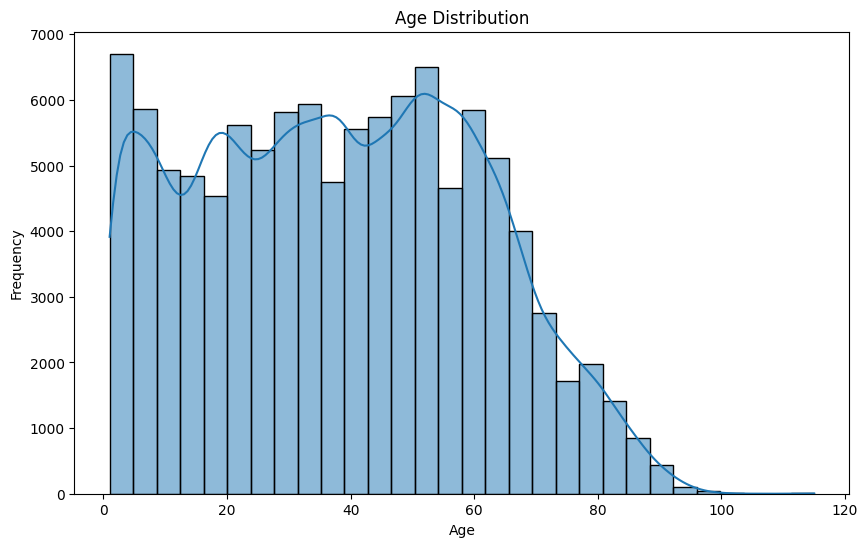

In [6]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

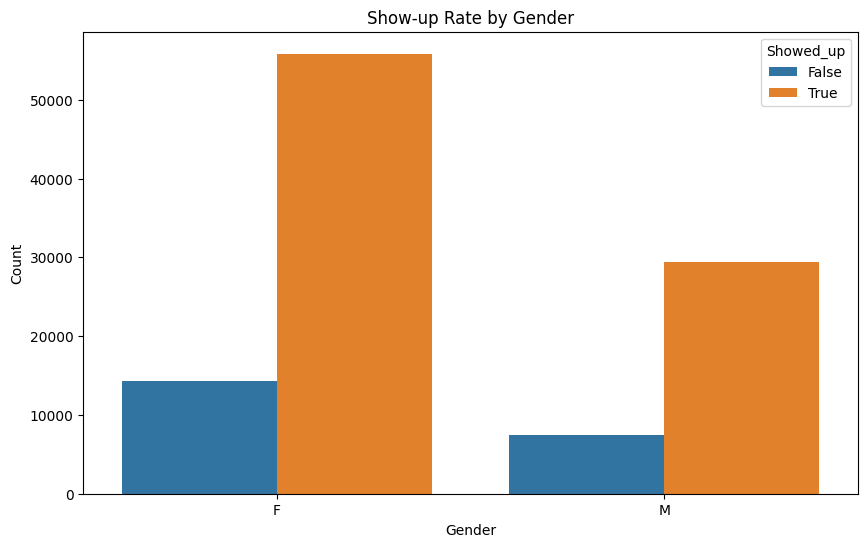

In [7]:
# Show-up rate by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Showed_up', data=data)
plt.title('Show-up Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

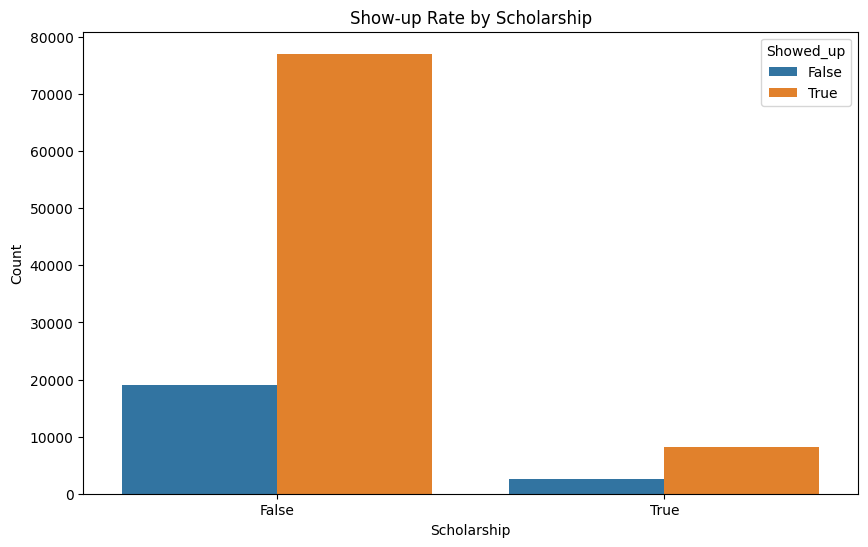

In [8]:
# Show-up rate by Scholarship
plt.figure(figsize=(10, 6))
sns.countplot(x='Scholarship', hue='Showed_up', data=data)
plt.title('Show-up Rate by Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Count')
plt.show()

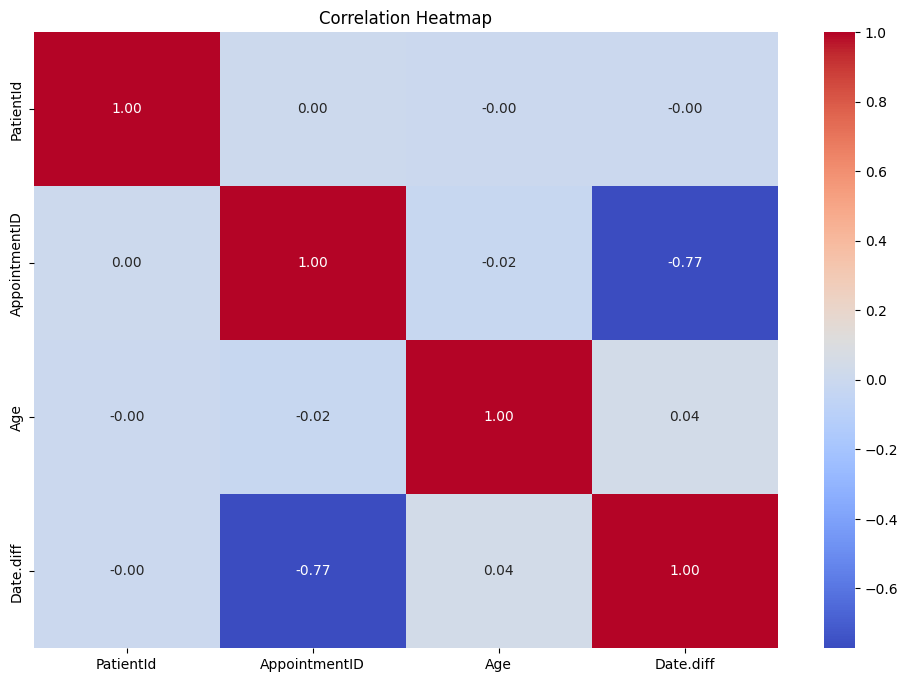

In [9]:
# Correlation heatmap
numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Train And Test Modele

In [11]:
# Prepare the data for modeling
X = data.drop(columns=['Showed_up', 'PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'])
y = data['Showed_up']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [13]:
# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Print accuracy and classification report
print('Accuracy:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 79.44667725955696
Classification Report:               precision    recall  f1-score   support

       False       0.33      0.02      0.03      4325
        True       0.80      0.99      0.89     17073

    accuracy                           0.79     21398
   macro avg       0.56      0.50      0.46     21398
weighted avg       0.70      0.79      0.71     21398



## Decision Tree Classification

In [15]:
# Create and train the Decision Tree Classifier
dec_clf = DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=5)
dec_clf.fit(X_train, y_train)

# Make predictions
y_pred = dec_clf.predict(X_test)

# Print accuracy and classification report
print('Decision Tree Classifier accuracy:', dec_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Decision Tree Classifier accuracy: 79.78783063837741
Classification Report:               precision    recall  f1-score   support

       False       0.00      0.00      0.00      4325
        True       0.80      1.00      0.89     17073

    accuracy                           0.80     21398
   macro avg       0.40      0.50      0.44     21398
weighted avg       0.64      0.80      0.71     21398



## Random Forest Classification


In [17]:
# Create and train the Random Forest classifier
rand_clf = RandomForestClassifier(n_estimators=20, criterion="entropy")
rand_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_clf.predict(X_test)

# Print accuracy and classification report
print('Random Forest Classifier accuracy:', rand_clf.score(X_test, y_test) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

Random Forest Classifier accuracy: 75.95569679409292
Classification Report:               precision    recall  f1-score   support

       False       0.34      0.21      0.26      4325
        True       0.82      0.90      0.86     17073

    accuracy                           0.76     21398
   macro avg       0.58      0.55      0.56     21398
weighted avg       0.72      0.76      0.74     21398



## SVM classification

In [19]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('SGDClassifier Accuracy: ', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))


SGDClassifier Accuracy:  79.78783063837741
Classification Report:               precision    recall  f1-score   support

       False       0.00      0.00      0.00      4325
        True       0.80      1.00      0.89     17073

    accuracy                           0.80     21398
   macro avg       0.40      0.50      0.44     21398
weighted avg       0.64      0.80      0.71     21398



## Navie Bayes

In [21]:
# Create and train the Naive Bayes classifier
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

# Make predictions using Naive Bayes model
y_pred = NaiveBayes.predict(X_test)

# Print accuracy and classification report
print('The accuracy of Naive Bayes is:', accuracy_score(y_test, y_pred) * 100)
print('Classification Report:', classification_report(y_test, y_pred))

The accuracy of Naive Bayes is: 76.74549023273202
Classification Report:               precision    recall  f1-score   support

       False       0.31      0.13      0.18      4325
        True       0.81      0.93      0.86     17073

    accuracy                           0.77     21398
   macro avg       0.56      0.53      0.52     21398
weighted avg       0.71      0.77      0.73     21398



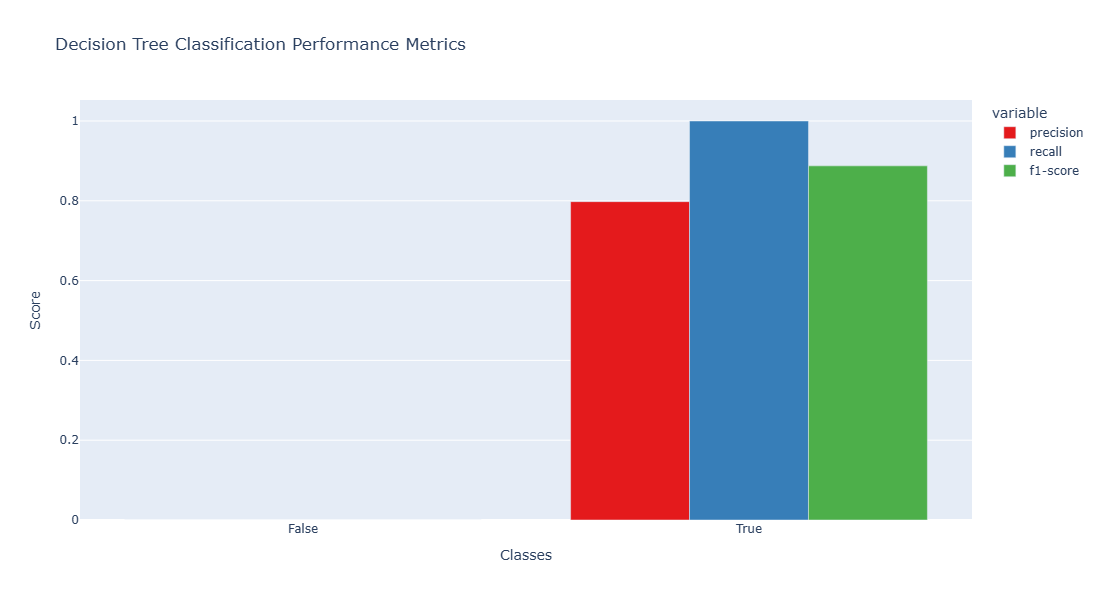

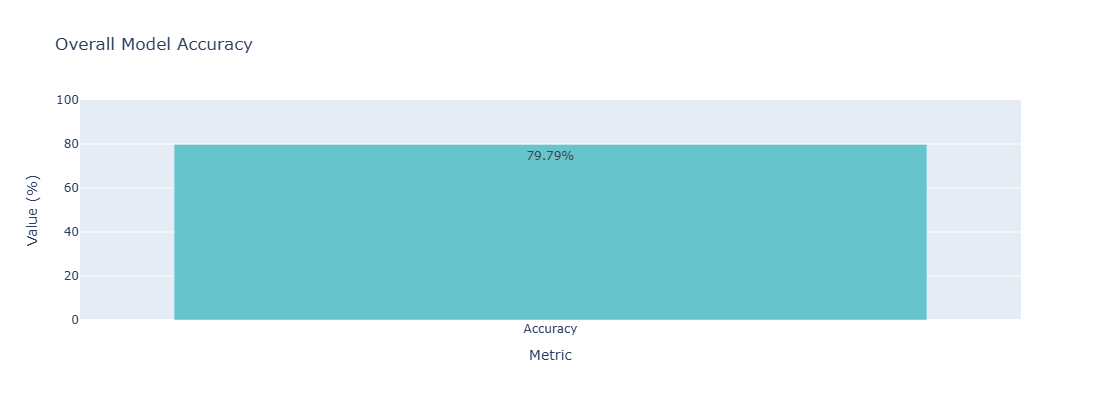

In [44]:
dec_clf = DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=5)
dec_clf.fit(X_train, y_train)

# Make predictions
y_pred = dec_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100

# Generate the classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Prepare the data for visualization
metrics_df = pd.DataFrame(report).T.reset_index()  # Convert to DataFrame and reset index
metrics_df = metrics_df.rename(columns={'index': 'Class'})  # Rename the columns

# Filter out accuracy and support rows for bar chart visualization
metrics_to_plot = metrics_df[~metrics_df['Class'].isin(['accuracy', 'macro avg', 'weighted avg'])]

# Plot bar chart for precision, recall, and F1-score
fig = px.bar(
    metrics_to_plot,
    x="Class",
    y=["precision", "recall", "f1-score"],
    barmode="group",
    title="Decision Tree Classification Performance Metrics",
    labels={"value": "Score", "Class": "Classes"},
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.update_layout(
    xaxis_title="Classes",
    yaxis_title="Score",
    height=600,
    width=800,
)
fig.show()


fig_accuracy.update_layout(
    height=400,
    width=600,
    yaxis=dict(range=[0, 100]),  # Ensure the range is 0-100%
)
fig_accuracy.show()
